## **Escenario 1**



Loan Smart es una empresa de asesoramiento en materia de préstamos. Basándose en las características de sus clientes y en el monto del préstamo que necesitan, les aconsejan en qué institución financiera solicitar un préstamo. Hasta ahora sus recomendaciones se han basado en la experiencia empresarial. Ahora están tratando de aprovechar el poder de los datos que han recogido hasta ahora.

Quieren comprobar si, dadas las características de sus clientes, pueden predecir las tasas de interés que les ofrecerán las distintas entidades financieras. Quieren hacer una prueba de concepto de esta idea. Nos han proporcionado los datos de una de estas entidades financieras.  Aplicaremos la técnica de REGRESIÓN LINEAL

## **Escenario 2**

**Predicción del riesgo del préstamo**

El problema de regresión es qué riesgo tiene el deudor. La respuesta a esta pregunta determina el tipo de interés que tendría el deudor. La tasa de interés mide, entre otras cosas (como el valor temporal del dinero), el riesgo del deudor. Un ejemplo de este concepto es que cuanto más riesgoso sea el deudor, mayor será la tasa de interés. Teniendo en cuenta la tasa de interés, podemos determinar si el deudor es apto para el préstamo.

**Objetivo**

El objetivo del problema es predecir el riesgo de devolución del préstamo en función de la tasa de interés aplicado.

**Variables en la base de datos**

1.   **Amount.Requested**: es la cantidad en dólares solicitada en la solicitud de préstamo.
2.   **Amount.Funded.By.Investors**: es la cantidad en dólares prestada al solicitante.
3.   **Interest.Rate**: Tasa de interés del préstamo
4.   **Loan.Length**: es la duración en meses del préstamo. Las duraciones consideradas en este informe son dos de las más populares: 36 meses y 60 meses.
5.   **Loan.Purpose**: es la finalidad del préstamo declarada por el solicitante. Se clasifican en coche, tarjetas de crédito, consolidación de deudas, educación, reformas, vivienda, compras importantes, medicamentos, mudanzas, energías renovables, pequeñas empresas, vacaciones, bodas y otros.
6.   **Debt.To.Income.Ratio**: es el porcentaje de los ingresos brutos del consumidor que se destina al pago de deudas.
7.   **State**: es la abreviatura de los 50 estados de EE.UU. en los que reside el solicitante.
8.   **Home.Ownership**: es la situación del solicitante en la vivienda actual, que incluye propiedad, alquiler o hipoteca.
9.   **Monthly.Income**: es la cantidad mensual en dólares que gana el solicitante.
10.   **FICO.Range**: es la medida de la solvencia del solicitante.
11.   **Open.CREDIT.Lines**: es el número de líneas de crédito abiertas que tenía el solicitante en el momento de la solicitud.
12.   **Revolving.CREDIT.Balance**: es el importe total pendiente de todas las líneas de crédito.
13.   **Inquiries.in.the.Last.6.Months**: es el número de consultas autorizadas en los 6 meses en que una persona autoriza al prestamista a indagar sobre su solvencia.
14.   **Employment.Length**: es el tiempo que lleva en el trabajo actual

### Importación de librerías y datos

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('loan_data_train.csv')
df.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


### Modificar nombres de las columnas

In [ ]:
df.columns = df.columns.str.replace(".","_")
df.columns

Index(['ID', 'Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',
       'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio', 'State',
       'Home_Ownership', 'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',
       'Employment_Length'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2199 non-null   float64
 1   Amount_Requested                2199 non-null   object 
 2   Amount_Funded_By_Investors      2199 non-null   object 
 3   Interest_Rate                   2200 non-null   object 
 4   Loan_Length                     2199 non-null   object 
 5   Loan_Purpose                    2199 non-null   object 
 6   Debt_To_Income_Ratio            2199 non-null   object 
 7   State                           2199 non-null   object 
 8   Home_Ownership                  2199 non-null   object 
 9   Monthly_Income                  2197 non-null   float64
 10  FICO_Range                      2200 non-null   object 
 11  Open_CREDIT_Lines               2196 non-null   object 
 12  Revolving_CREDIT_Balance        21

In [ ]:
# Revisión de datos faltantes
df.isnull().sum()

,0
ID,1
Amount_Requested,1
Amount_Funded_By_Investors,1
Interest_Rate,0
Loan_Length,1
Loan_Purpose,1
Debt_To_Income_Ratio,1
State,1
Home_Ownership,1
Monthly_Income,3


In [ ]:
# Visualizar la moda de una columna
df['Employment_Length'].mode()[0]

'10+ years'

In [ ]:
# Llenar los datos faltantes de la columna con la moda de la misma
df['Employment_Length']=df['Employment_Length'].fillna(df['Employment_Length'].mode()[0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2199 non-null   float64
 1   Amount_Requested                2199 non-null   object 
 2   Amount_Funded_By_Investors      2199 non-null   object 
 3   Interest_Rate                   2200 non-null   object 
 4   Loan_Length                     2199 non-null   object 
 5   Loan_Purpose                    2199 non-null   object 
 6   Debt_To_Income_Ratio            2199 non-null   object 
 7   State                           2199 non-null   object 
 8   Home_Ownership                  2199 non-null   object 
 9   Monthly_Income                  2197 non-null   float64
 10  FICO_Range                      2200 non-null   object 
 11  Open_CREDIT_Lines               2196 non-null   object 
 12  Revolving_CREDIT_Balance        21

In [ ]:
# Eliminar los registros que tengan datos faltantes
df.dropna(axis=0 , inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2186 entries, 0 to 2199
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2186 non-null   float64
 1   Amount_Requested                2186 non-null   object 
 2   Amount_Funded_By_Investors      2186 non-null   object 
 3   Interest_Rate                   2186 non-null   object 
 4   Loan_Length                     2186 non-null   object 
 5   Loan_Purpose                    2186 non-null   object 
 6   Debt_To_Income_Ratio            2186 non-null   object 
 7   State                           2186 non-null   object 
 8   Home_Ownership                  2186 non-null   object 
 9   Monthly_Income                  2186 non-null   float64
 10  FICO_Range                      2186 non-null   object 
 11  Open_CREDIT_Lines               2186 non-null   object 
 12  Revolving_CREDIT_Balance        2186 no

## Modificación de tipos de datos

In [ ]:
df['Amount_Requested'] = pd.to_numeric(df['Amount_Requested'],errors = 'coerce')
df['Amount_Funded_By_Investors'] = pd.to_numeric(df['Amount_Funded_By_Investors'],errors = 'coerce')
df['Open_CREDIT_Lines'] = pd.to_numeric(df['Open_CREDIT_Lines'],errors = 'coerce')
df['Revolving_CREDIT_Balance'] = pd.to_numeric(df['Revolving_CREDIT_Balance'],errors = 'coerce')
df['Inquiries_in_the_Last_6_Months'] = pd.to_numeric(df['Inquiries_in_the_Last_6_Months'],errors = 'coerce')

In [ ]:
df.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,79542.0,25000.0,25000.00,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11.0,15210.0,3.0,5 years
1,75473.0,19750.0,19750.00,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14.0,19070.0,3.0,4 years
2,67265.0,2100.0,2100.00,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13.0,893.0,1.0,< 1 year
3,80167.0,28000.0,28000.00,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12.0,38194.0,1.0,10+ years
4,17240.0,24250.0,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6.0,31061.0,2.0,10+ years


In [ ]:
df['Interest_Rate']=df['Interest_Rate'].str.replace('%','').astype('float64')

In [ ]:
df['Loan_Length']=df['Loan_Length'].str.split(' ').apply(lambda x : x[0]).tolist()

In [ ]:
df['Loan_Length'] = pd.to_numeric(df['Loan_Length'],errors = 'coerce')

In [ ]:
df['Debt_To_Income_Ratio']=df['Debt_To_Income_Ratio'].str.replace('%','').astype('float64')

In [ ]:
df.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,79542.0,25000.0,25000.00,18.49,60.0,debt_consolidation,27.56,VA,MORTGAGE,8606.56,720-724,11.0,15210.0,3.0,5 years
1,75473.0,19750.0,19750.00,17.27,60.0,debt_consolidation,13.39,NY,MORTGAGE,6737.50,710-714,14.0,19070.0,3.0,4 years
2,67265.0,2100.0,2100.00,14.33,36.0,major_purchase,3.50,LA,OWN,1000.00,690-694,13.0,893.0,1.0,< 1 year
3,80167.0,28000.0,28000.00,16.29,36.0,credit_card,19.62,NV,MORTGAGE,7083.33,710-714,12.0,38194.0,1.0,10+ years
4,17240.0,24250.0,17431.82,12.23,60.0,credit_card,23.79,OH,MORTGAGE,5833.33,730-734,6.0,31061.0,2.0,10+ years


In [ ]:
df.Employment_Length = df.Employment_Length.str.replace('<','')
df.Employment_Length = df.Employment_Length.str.replace('years','')
df.Employment_Length = df.Employment_Length.str.replace('year','')
df.Employment_Length = df.Employment_Length.str.replace('+','')
df['Employment_Length'] = pd.to_numeric(df['Employment_Length'],errors = 'coerce')

In [ ]:
df[['Min_Fic','Max_Fic']] = df.FICO_Range.str.split('-',expand=True).astype('float64')
df['Fico_Mean'] = (df.Min_Fic + df.Max_Fic)/2

display(df,df.dtypes)

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Min_Fic,Max_Fic,Fico_Mean
0,79542.0,25000.0,25000.00,18.49,60.0,debt_consolidation,27.56,VA,MORTGAGE,8606.56,720-724,11.0,15210.0,3.0,5.0,720.0,724.0,722.0
1,75473.0,19750.0,19750.00,17.27,60.0,debt_consolidation,13.39,NY,MORTGAGE,6737.50,710-714,14.0,19070.0,3.0,4.0,710.0,714.0,712.0
2,67265.0,2100.0,2100.00,14.33,36.0,major_purchase,3.50,LA,OWN,1000.00,690-694,13.0,893.0,1.0,1.0,690.0,694.0,692.0
3,80167.0,28000.0,28000.00,16.29,36.0,credit_card,19.62,NV,MORTGAGE,7083.33,710-714,12.0,38194.0,1.0,10.0,710.0,714.0,712.0
4,17240.0,24250.0,17431.82,12.23,60.0,credit_card,23.79,OH,MORTGAGE,5833.33,730-734,6.0,31061.0,2.0,10.0,730.0,734.0,732.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,74047.0,30000.0,30000.00,23.28,60.0,other,12.10,IL,MORTGAGE,7083.33,675-679,16.0,17969.0,1.0,10.0,675.0,679.0,677.0
2196,63768.0,4200.0,4200.00,14.33,60.0,car,14.16,NJ,RENT,3850.00,700-704,4.0,5718.0,0.0,2.0,700.0,704.0,702.0
2197,94545.0,19800.0,19775.00,15.31,60.0,debt_consolidation,15.03,IL,MORTGAGE,6666.67,675-679,10.0,46879.0,3.0,6.0,675.0,679.0,677.0
2198,53635.0,18000.0,18000.00,20.99,60.0,credit_card,11.63,CA,RENT,9051.83,670-674,5.0,32394.0,2.0,4.0,670.0,674.0,672.0


,0
ID,float64
Amount_Requested,float64
Amount_Funded_By_Investors,float64
Interest_Rate,float64
Loan_Length,float64
Loan_Purpose,object
Debt_To_Income_Ratio,float64
State,object
Home_Ownership,object
Monthly_Income,float64


In [ ]:
## drop insignificant columns
df = df.drop(['ID','FICO_Range','Min_Fic','Max_Fic'],axis=1)
df.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_Mean
0,25000.0,25000.00,18.49,60.0,debt_consolidation,27.56,VA,MORTGAGE,8606.56,11.0,15210.0,3.0,5.0,722.0
1,19750.0,19750.00,17.27,60.0,debt_consolidation,13.39,NY,MORTGAGE,6737.50,14.0,19070.0,3.0,4.0,712.0
2,2100.0,2100.00,14.33,36.0,major_purchase,3.50,LA,OWN,1000.00,13.0,893.0,1.0,1.0,692.0
3,28000.0,28000.00,16.29,36.0,credit_card,19.62,NV,MORTGAGE,7083.33,12.0,38194.0,1.0,10.0,712.0
4,24250.0,17431.82,12.23,60.0,credit_card,23.79,OH,MORTGAGE,5833.33,6.0,31061.0,2.0,10.0,732.0


In [ ]:
df.Home_Ownership.unique()

array(['MORTGAGE', 'OWN', 'RENT', 'OTHER'], dtype=object)

In [ ]:
df.State.unique()

array(['VA', 'NY', 'LA', 'NV', 'OH', 'CA', 'IL', 'NC', 'NJ', 'WA', 'CT',
       'AK', 'CO', 'MA', 'TX', 'VT', 'OK', 'FL', 'NH', 'GA', 'MN', 'MD',
       'WY', 'PA', 'AL', 'AZ', 'SC', 'MI', 'OR', 'RI', 'NM', 'MO', 'WI',
       'KY', 'UT', 'AR', 'WV', 'DE', 'MT', 'KS', 'DC', 'SD', 'HI', 'IN',
       'MS', '.'], dtype=object)

In [ ]:
df.Loan_Purpose.unique()

array(['debt_consolidation', 'major_purchase', 'credit_card',
       'small_business', 'home_improvement', 'other', 'car', 'moving',
       'house', 'educational', 'vacation', 'wedding', 'medical',
       'renewable_energy'], dtype=object)

In [ ]:
## Separación de variables numéricas y categóricas:

Numeric_data = df.columns[df.dtypes != 'object']
Cat_data = df.columns[df.dtypes == 'object']

Num_Vars = df[Numeric_data]
Cat_Vars = df[Cat_data]
Y_Var = df[['Interest_Rate']]
display('Num_Vars',Num_Vars.head(3),Num_Vars.shape,'Cat_Vars',Cat_Vars.head(3),Cat_Vars.shape,'Y_Var',Y_Var.head(3),Y_Var.shape)

'Num_Vars'

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_Mean
0,25000.0,25000.0,18.49,60.0,27.56,8606.56,11.0,15210.0,3.0,5.0,722.0
1,19750.0,19750.0,17.27,60.0,13.39,6737.50,14.0,19070.0,3.0,4.0,712.0
2,2100.0,2100.0,14.33,36.0,3.50,1000.00,13.0,893.0,1.0,1.0,692.0


(2186, 11)

'Cat_Vars'

,Loan_Purpose,State,Home_Ownership
0,debt_consolidation,VA,MORTGAGE
1,debt_consolidation,NY,MORTGAGE
2,major_purchase,LA,OWN


(2186, 3)

'Y_Var'

,Interest_Rate
0,18.49
1,17.27
2,14.33


(2186, 1)

In [ ]:
Cat_Vars = Cat_Vars.drop(['State'],axis=1)
Cat_Vars.head()

,Loan_Purpose,Home_Ownership
0,debt_consolidation,MORTGAGE
1,debt_consolidation,MORTGAGE
2,major_purchase,OWN
3,credit_card,MORTGAGE
4,credit_card,MORTGAGE


In [ ]:
Num_Vars = Num_Vars.drop('Interest_Rate',axis=1)
Num_Vars.head(3)

,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_Mean
0,25000.0,25000.0,60.0,27.56,8606.56,11.0,15210.0,3.0,5.0,722.0
1,19750.0,19750.0,60.0,13.39,6737.50,14.0,19070.0,3.0,4.0,712.0
2,2100.0,2100.0,36.0,3.50,1000.00,13.0,893.0,1.0,1.0,692.0


### Manejo de datos atípicos (outliers) y valores faltantes

In [ ]:
Num_Vars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2186 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2182 non-null   float64
 1   Amount_Funded_By_Investors      2183 non-null   float64
 2   Loan_Length                     2185 non-null   float64
 3   Debt_To_Income_Ratio            2186 non-null   float64
 4   Monthly_Income                  2186 non-null   float64
 5   Open_CREDIT_Lines               2183 non-null   float64
 6   Revolving_CREDIT_Balance        2184 non-null   float64
 7   Inquiries_in_the_Last_6_Months  2186 non-null   float64
 8   Employment_Length               2185 non-null   float64
 9   Fico_Mean                       2186 non-null   float64
dtypes: float64(10)
memory usage: 187.9 KB


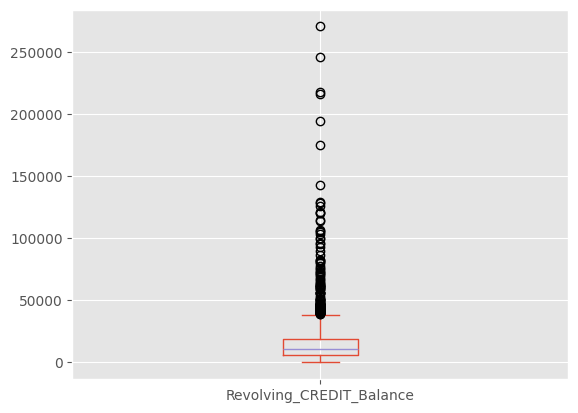

In [ ]:
Num_Vars['Revolving_CREDIT_Balance'].plot(kind='box')
plt.show()

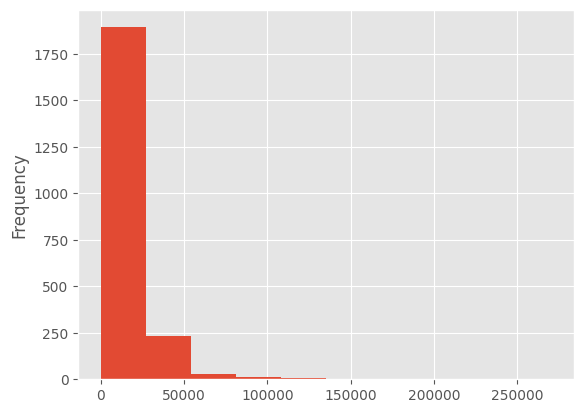

In [ ]:
Num_Vars['Revolving_CREDIT_Balance'].plot(kind='hist')
plt.show()

In [ ]:
def outlier_missing_treatment(x):
    x = np.clip(x, a_min = x.quantile(0.05), a_max = x.quantile(0.95))
    x = x.fillna(x.median())
    return(x)

In [ ]:
Num_Vars = Num_Vars.apply(outlier_missing_treatment)
Num_Vars

,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_Mean
0,25000.0,25000.00,60.0,27.56,8606.56,11.0,15210.00,3.0,5.0,722.0
1,19750.0,19750.00,60.0,13.39,6737.50,14.0,19070.00,3.0,4.0,712.0
2,2800.0,2202.50,36.0,3.50,2166.67,13.0,1040.95,1.0,1.0,692.0
3,28000.0,27950.00,36.0,19.62,7083.33,12.0,38194.00,1.0,10.0,712.0
4,24250.0,17431.82,60.0,23.79,5833.33,6.0,31061.00,2.0,10.0,732.0
...,...,...,...,...,...,...,...,...,...,...
2195,28000.0,27950.00,60.0,12.10,7083.33,16.0,17969.00,1.0,10.0,677.0
2196,4200.0,4200.00,60.0,14.16,3850.00,4.0,5718.00,0.0,2.0,702.0
2197,19800.0,19775.00,60.0,15.03,6666.67,10.0,40695.55,3.0,6.0,677.0
2198,18000.0,18000.00,60.0,11.63,9051.83,5.0,32394.00,2.0,4.0,672.0


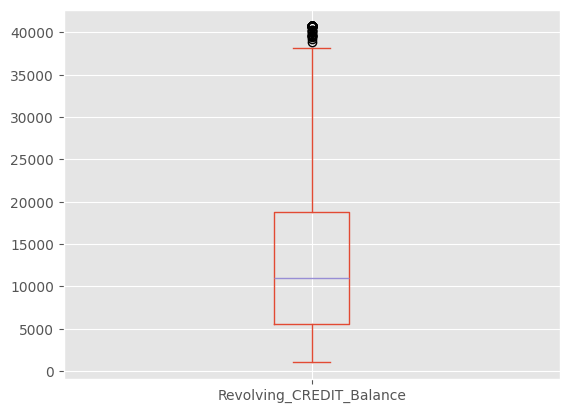

In [ ]:
Num_Vars['Revolving_CREDIT_Balance'].plot(kind='box')
plt.show()

In [ ]:
def Mode_treatment(x):
    x = x.fillna(x.mode)
    return(x)

In [ ]:
Cat_Vars = Cat_Vars.apply(Mode_treatment)

### Creación de variables "dummmy" para variables categóricas

In [ ]:
dummy_vars = pd.get_dummies(Cat_Vars, dtype='int', drop_first=True)
dummy_vars

,Loan_Purpose_credit_card,Loan_Purpose_debt_consolidation,Loan_Purpose_educational,Loan_Purpose_home_improvement,Loan_Purpose_house,Loan_Purpose_major_purchase,Loan_Purpose_medical,Loan_Purpose_moving,Loan_Purpose_other,Loan_Purpose_renewable_energy,Loan_Purpose_small_business,Loan_Purpose_vacation,Loan_Purpose_wedding,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2197,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2198,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_final = pd.concat([Num_Vars, dummy_vars, Y_Var], axis=1)

df_final

,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_Mean,...,Loan_Purpose_moving,Loan_Purpose_other,Loan_Purpose_renewable_energy,Loan_Purpose_small_business,Loan_Purpose_vacation,Loan_Purpose_wedding,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT,Interest_Rate
0,25000.0,25000.00,60.0,27.56,8606.56,11.0,15210.00,3.0,5.0,722.0,...,0,0,0,0,0,0,0,0,0,18.49
1,19750.0,19750.00,60.0,13.39,6737.50,14.0,19070.00,3.0,4.0,712.0,...,0,0,0,0,0,0,0,0,0,17.27
2,2800.0,2202.50,36.0,3.50,2166.67,13.0,1040.95,1.0,1.0,692.0,...,0,0,0,0,0,0,0,1,0,14.33
3,28000.0,27950.00,36.0,19.62,7083.33,12.0,38194.00,1.0,10.0,712.0,...,0,0,0,0,0,0,0,0,0,16.29
4,24250.0,17431.82,60.0,23.79,5833.33,6.0,31061.00,2.0,10.0,732.0,...,0,0,0,0,0,0,0,0,0,12.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,28000.0,27950.00,60.0,12.10,7083.33,16.0,17969.00,1.0,10.0,677.0,...,0,1,0,0,0,0,0,0,0,23.28
2196,4200.0,4200.00,60.0,14.16,3850.00,4.0,5718.00,0.0,2.0,702.0,...,0,0,0,0,0,0,0,0,1,14.33
2197,19800.0,19775.00,60.0,15.03,6666.67,10.0,40695.55,3.0,6.0,677.0,...,0,0,0,0,0,0,0,0,0,15.31
2198,18000.0,18000.00,60.0,11.63,9051.83,5.0,32394.00,2.0,4.0,672.0,...,0,0,0,0,0,0,0,0,1,20.99


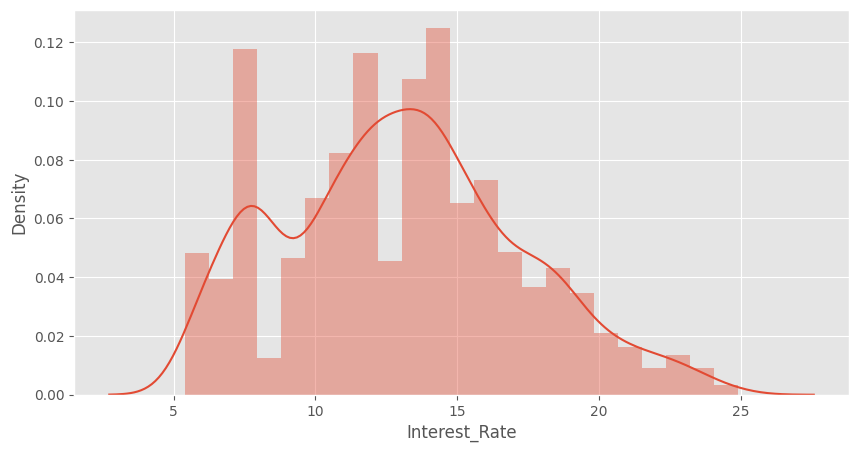

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df_final.Interest_Rate)
plt.show()

# Selección de las variables más importantes

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [ ]:
train,test = train_test_split(df_final, test_size = 0.3, random_state = 123)

In [ ]:
y_train = train['Interest_Rate']
X_train = train[train.columns.difference(['Interest_Rate'])]
X_train = sm.add_constant(X_train)

y_test = test['Interest_Rate']
X_test = test[test.columns.difference(['Interest_Rate'])]
X_test = sm.add_constant(X_test)

In [ ]:
# Ajustar el modelo inicial
initial_features = X_train.columns.tolist()
model = sm.OLS(y_train, X_train[initial_features]).fit()

# Almacenar resultados
results = []

# Selección hacia adelante y hacia atrás
features = initial_features.copy()
remaining_features = set(features)
best_model = model
best_aic = best_model.aic

# Paso 1: Selección hacia adelante
while remaining_features:
    aic_with_candidates = []
    for candidate in remaining_features:
        temp_features = features + [candidate]
        temp_model = sm.OLS(y_train, X_train[temp_features]).fit()
        aic_with_candidates.append((temp_model.aic, candidate))

    aic_with_candidates.sort()
    best_new_aic, best_candidate = aic_with_candidates[0]

    if best_new_aic < best_aic:
        features.append(best_candidate)
        best_aic = best_new_aic
        best_model = sm.OLS(y_train, X_train[features]).fit()
        remaining_features.remove(best_candidate)
        results.append({
            'Step': 'Add',
            'Features': features.copy(),
            'AIC': best_aic
        })
    else:
        break

# Paso 2: Selección hacia atrás
while len(features) > 0:
    aic_with_candidates = []
    for candidate in features:
        temp_features = [f for f in features if f != candidate]
        temp_model = sm.OLS(y_train, X_train[temp_features]).fit()
        aic_with_candidates.append((temp_model.aic, candidate))

    aic_with_candidates.sort()
    best_new_aic, worst_candidate = aic_with_candidates[0]

    if best_new_aic < best_aic:
        features.remove(worst_candidate)
        best_aic = best_new_aic
        best_model = sm.OLS(y_train, X_train[features]).fit()
        results.append({
            'Step': 'Remove',
            'Features': features.copy(),
            'AIC': best_aic
        })
    else:
        break

# Convertir resultados a DataFrame para impresión
results_df = pd.DataFrame(results)
print("\nResumen de Selección de Características:")
print(results_df)

# Modelo final
print("\nModelo Final:")
print(best_model.summary())


Resumen de Selección de Características:
     Step                                           Features          AIC
0  Remove  [const, Amount_Funded_By_Investors, Amount_Req...  6421.121879
1  Remove  [const, Amount_Funded_By_Investors, Amount_Req...  6419.122753
2  Remove  [const, Amount_Funded_By_Investors, Amount_Req...  6417.128783
3  Remove  [const, Amount_Funded_By_Investors, Amount_Req...  6415.169450
4  Remove  [const, Amount_Funded_By_Investors, Amount_Req...  6413.227833
5  Remove  [const, Amount_Funded_By_Investors, Amount_Req...  6411.667661
6  Remove  [const, Amount_Funded_By_Investors, Amount_Req...  6410.137148
7  Remove  [const, Amount_Funded_By_Investors, Amount_Req...  6409.450906
8  Remove  [const, Amount_Funded_By_Investors, Amount_Req...  6409.085673
9  Remove  [const, Amount_Funded_By_Investors, Amount_Req...  6408.448681

Modelo Final:
                            OLS Regression Results                            
Dep. Variable:          Interest_Rate   R-squared:

## Now reducing Variables on basis of P-value:

In [ ]:
import statsmodels.formula.api as smf

finalmodel = smf.ols('Interest_Rate ~  Amount_Funded_By_Investors + Amount_Requested + Fico_Mean + Home_Ownership_RENT + Inquiries_in_the_Last_6_Months + Loan_Length + Loan_Purpose_credit_card + Loan_Purpose_debt_consolidation + Loan_Purpose_wedding + Monthly_Income + Open_CREDIT_Lines + Amount_Requested'
                    , data=train).fit()
print(finalmodel.summary2())

                        Results: Ordinary least squares
Model:                    OLS                  Adj. R-squared:         0.785    
Dependent Variable:       Interest_Rate        AIC:                    6409.7707
Date:                     2025-02-19 10:25     BIC:                    6473.7670
No. Observations:         1530                 Log-Likelihood:         -3192.9  
Df Model:                 11                   F-statistic:            509.5    
Df Residuals:             1518                 Prob (F-statistic):     0.00     
R-squared:                0.787                Scale:                  3.8332   
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------------------
Intercept                       73.2460   1.2052  60.7761 0.0000 70.8820 75.6100
Amount_Funded_By_Investors       0.0001   0.0000   3.

## 4: Post Model

In [ ]:
from sklearn import metrics
import scipy.stats as stats

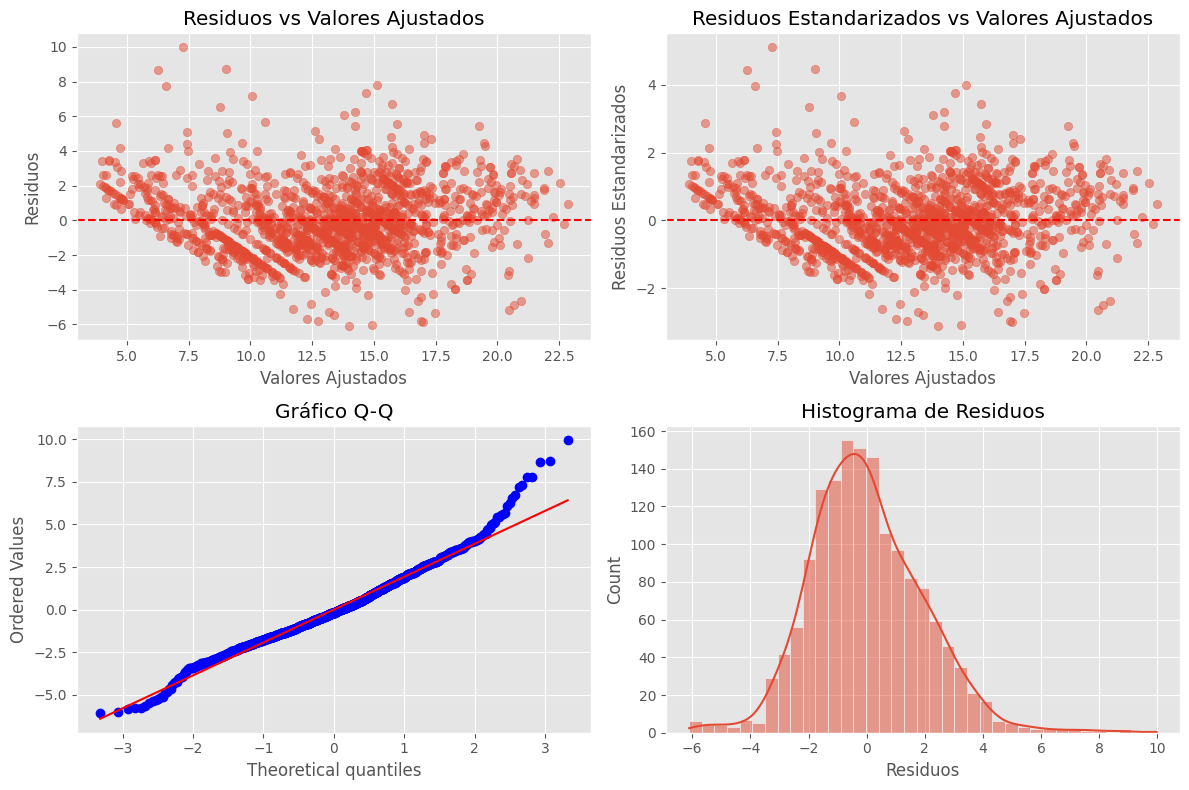

In [ ]:
y_pred = finalmodel.fittedvalues
residuals = finalmodel.resid

plt.figure(figsize=(12, 8))

# Residuos vs Valores Ajustados
plt.subplot(2, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Ajustados')

# Residuos Estandarizados
std_residuals = residuals / np.sqrt(best_model.scale)
plt.subplot(2, 2, 2)
plt.scatter(y_pred, std_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos Estandarizados')
plt.title('Residuos Estandarizados vs Valores Ajustados')

# Gráfico Q-Q
plt.subplot(2, 2, 3)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Gráfico Q-Q')

# Histograma de Residuos
plt.subplot(2, 2, 4)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuos')
plt.title('Histograma de Residuos')

plt.tight_layout()
plt.show()

In [ ]:
# Prueba de Breusch-Pagan para homocedasticidad de la varianza
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']

# Get the test result
test_result = sms.het_breuschpagan(finalmodel.resid, finalmodel.model.exog)

lzip(names, test_result)

[('Lagrange multiplier statistic', 12.358945053737052),
 ('p-value', 0.3372759901156231),
 ('f-value', 1.123806193735386),
 ('f p-value', 0.3380435319982726)]

Puesto que el p-value es mayor que 0.05, aceptamos la hipótesis nula de que los residuos tienen la varianza constante, luego el modelo de regresión múltiple es apropiado

In [55]:
# Prueba de Durbin-Watson para autocorrelación de residuos
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(finalmodel.resid)

1.9552879153186276

Puesto que el indice de Durbin-Watson está entre 1.5 y 2.5, podemos considerar que la autocorrelación de residuos no es problemática en este modelo de regresión

In [ ]:
train['pred'] = finalmodel.fittedvalues

train.head(3)

,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_Mean,...,Loan_Purpose_other,Loan_Purpose_renewable_energy,Loan_Purpose_small_business,Loan_Purpose_vacation,Loan_Purpose_wedding,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT,Interest_Rate,pred
1828,19800.0,19775.0,36.0,20.0900,6666.67,8.0,31220.00,0.0,1.0,732.0,...,0,0,0,0,0,0,0,0,13.23,10.691078
1685,5000.0,5000.0,36.0,28.3575,3166.67,4.0,1040.95,1.0,10.0,752.0,...,0,0,0,0,0,0,0,1,9.91,7.446016
1696,22500.0,22500.0,36.0,19.9300,5208.33,5.0,22876.00,0.0,10.0,757.0,...,1,0,0,0,0,0,1,0,7.90,9.724178


In [ ]:
test['pred'] = finalmodel.predict(X_test)

test.head(6)

,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_Mean,...,Loan_Purpose_other,Loan_Purpose_renewable_energy,Loan_Purpose_small_business,Loan_Purpose_vacation,Loan_Purpose_wedding,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT,Interest_Rate,pred
237,8400.0,8400.0,36.0,8.7000,3000.00,6.0,6215.0,0.0,2.0,752.0,...,0,0,0,0,0,0,1,0,5.99,7.119286
1402,14000.0,14000.0,36.0,27.5000,9166.67,17.0,18813.0,3.0,8.0,697.0,...,0,0,1,0,0,0,0,1,14.09,14.641459
597,14600.0,14600.0,36.0,28.3575,2500.00,14.0,23616.0,1.0,2.0,732.0,...,0,0,0,0,0,0,1,0,9.76,10.239092
1896,10000.0,10000.0,36.0,17.8800,2500.00,6.0,11120.0,0.0,3.0,702.0,...,0,0,0,0,0,0,0,1,10.74,12.546333
292,27925.0,27925.0,60.0,3.9400,7000.00,14.0,9914.0,2.0,10.0,687.0,...,0,0,0,0,0,0,0,0,22.47,20.293631
718,12000.0,11975.0,36.0,18.9900,4750.00,13.0,25577.0,1.0,4.0,752.0,...,0,0,0,0,0,0,0,1,8.94,7.999575


In [ ]:
# Error absoluto medio porcentual
MAPE_train = round(np.mean(np.abs((train.Interest_Rate - train.pred)/train.Interest_Rate))*100,2)
print('MAPE_train',MAPE_train)

# Mean Squared Error:  Error Cuadrado Medio
MSE_train = metrics.mean_squared_error(train.Interest_Rate , train.pred)
print('MSE_train',MSE_train)

# Coeficiente de correlación
Corr_train = stats.stats.pearsonr(train.Interest_Rate , train.pred)
print('Corr_train',Corr_train)

MAPE_train 12.83
MSE_train 3.8031485950255326
Corr_train PearsonRResult(statistic=0.8870532765521161, pvalue=0.0)


In [ ]:
MAPE_test = round(np.mean(np.abs((test.Interest_Rate - test.pred)/test.Interest_Rate))*100,2)
print('MAPE_test',MAPE_test)

MSE_test = metrics.mean_squared_error(test.Interest_Rate , test.pred)
print('MSE_test',MSE_test)

Corr_test = stats.stats.pearsonr(test.Interest_Rate , test.pred)
print('Corr_test',Corr_test)

MAPE_test 12.26
MSE_test 3.4913777375455046
Corr_test PearsonRResult(statistic=0.886404484484187, pvalue=6.051557142175097e-221)


## Decile Analysis:

In [ ]:
train['Deciles']=pd.qcut(train['pred'],10, labels=False)

In [ ]:
avg_actual = train[['Deciles','Interest_Rate']].groupby(train.Deciles).mean().sort_index(ascending=False)['Interest_Rate']

avg_pred = train[['Deciles','pred']].groupby(train.Deciles).mean().sort_index(ascending=False)['pred']

Decile_analysis_train = pd.concat([avg_actual, avg_pred], axis=1)

Decile_analysis_train

,Interest_Rate,pred
Deciles,,
9,20.168497,19.478558
8,16.725490,16.668516
7,15.926667,15.500627
6,14.838824,14.630991
5,13.330784,13.820879
4,12.620196,13.052373
3,11.295621,11.938427
2,9.826013,10.548680
1,8.552876,8.900981


<Axes: xlabel='Deciles'>

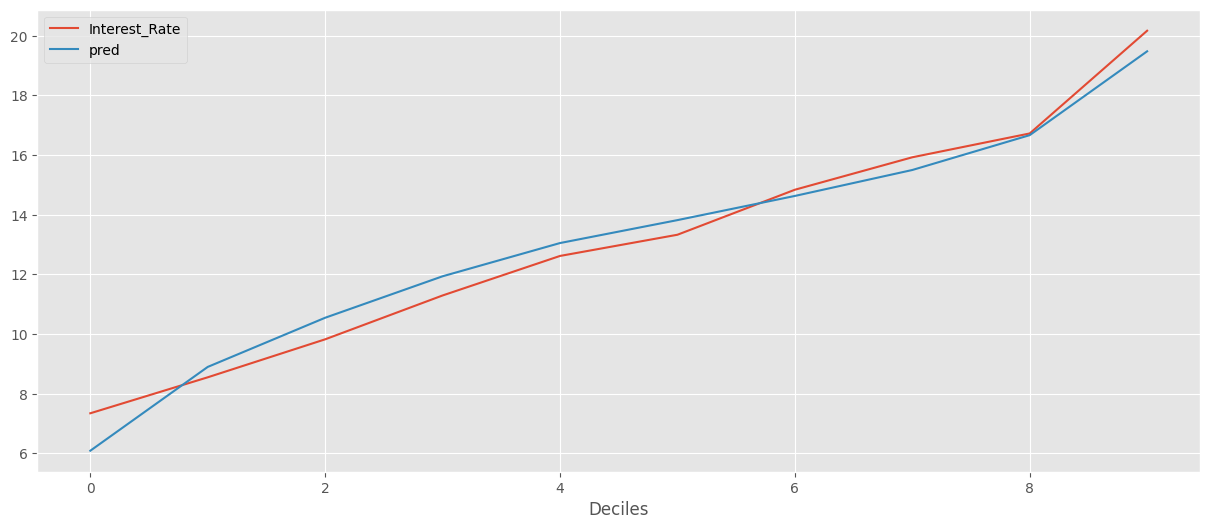

In [ ]:
Decile_analysis_train.plot(kind='line', figsize=(15,6))

In [ ]:
test['Deciles']=pd.qcut(test['pred'],10, labels=False)
avg_actual = test[['Deciles','Interest_Rate']].groupby(test.Deciles).mean().sort_index(ascending=False)['Interest_Rate']

avg_pred = test[['Deciles','pred']].groupby(test.Deciles).mean().sort_index(ascending=False)['pred']

Decile_analysis_test = pd.concat([avg_actual, avg_pred], axis=1)

Decile_analysis_test

,Interest_Rate,pred
Deciles,,
9,19.375606,19.104225
8,17.064769,16.444877
7,15.155758,15.411986
6,14.784308,14.783098
5,13.737273,13.918717
4,12.612615,12.924772
3,11.495303,11.936829
2,9.985231,10.787548
1,8.765152,9.100888


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(test.Interest_Rate , test.pred))

0.7855820820209305
